In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [264]:
df = pd.read_csv("/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/biomass_vs_bs_all.csv")


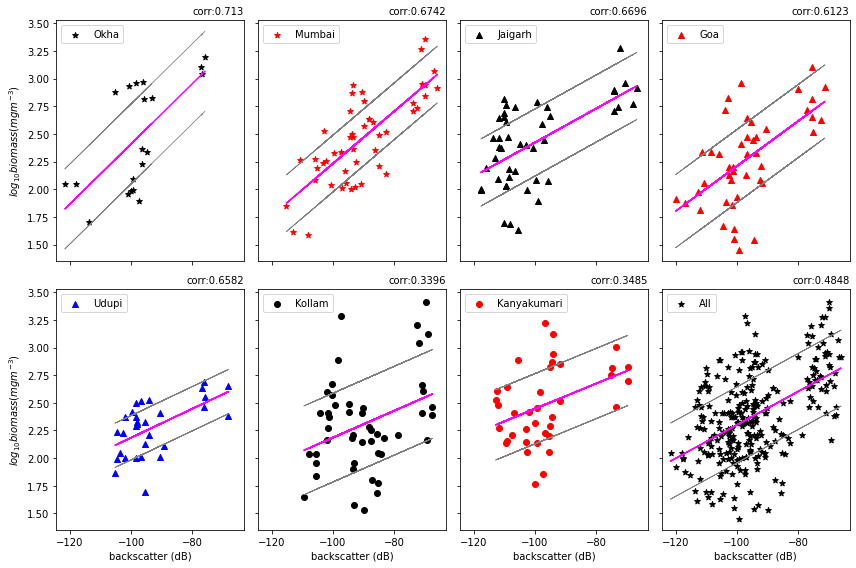

In [319]:
### removing of the outlier

data = {'ood_bm': df["ood_bm"],
        'ood_bs': df["ood_bs"]}

df1 = pd.DataFrame(data)

# Sort Column1 based on the values in Column2
sorted_df = df1.sort_values(by='ood_bm')
df1.loc[rows_to_set_nan] = np.nan


tot_bm = np.array([df1["ood_bm"],df["omd_bm"],df["ojd_bm"],df["ogd_bm"],df["oud_bm"],df["okd_bm"],df["kkd_bm"]])
tot_bs = np.array([df1["ood_bs"],df["omd_bs"],df["ojd_bs"],df["ogd_bs"],df["oud_bs"],df["okd_bs"],df["kkd_bs"]])

arr_bm = [df1["ood_bm"],df["omd_bm"],df["ojd_bm"],df["ogd_bm"],df["oud_bm"],df["okd_bm"],df["kkd_bm"],tot_bm.flatten()]
arr_bs = [df1["ood_bs"],df["omd_bs"],df["ojd_bs"],df["ogd_bs"],df["oud_bs"],df["okd_bs"],df["kkd_bs"],tot_bs.flatten()]

degree = 1
trendline = []
x = [e[~np.isnan(e)] for e in arr_bs]
y = [e[~np.isnan(e)] for e in arr_bm]
cor = [np.round(np.corrcoef(x[i],y[i])[0,1],4) for i in range(len(x))]

arbs_mat = np.reshape(x,(2,4))
arbm_mat = np.reshape(y,(2,4))
colors = np.reshape(np.array(['k','r','k','r','b','k','r','k']),(2,4))
labels = np.reshape(np.array(['Okha','Mumbai','Jaigarh','Goa','Udupi','Kollam','Kanyakumari','All']),(2,4))
markers = np.reshape(np.array(['*','*','^','^','^','o','o','*']),(2,4))
correlation = np.reshape(cor,(2,4))

#with outlier removed
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(12,8),sharey=True,sharex=True)
slopey = []

for i in range(2):
    for j in range(4):
        x1 = arbs_mat[i,j][~np.isnan(arbs_mat[i,j])]
        y1 = arbm_mat[i,j][~np.isnan(arbm_mat[i,j])]
        
        coef = np.polyfit(x1,np.log10(y1),degree)
        slope, intercept = coef
        slopey.append(np.round(slope,2))
        fit_line = slope * x1 + intercept 
        std_dev = np.std(np.log10(y1)-fit_line)
        upper_bound = fit_line - std_dev
        lower_bound = fit_line + std_dev
        ax[i,j].plot(x1,upper_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(x1,lower_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(x1,fit_line,color='magenta')
        ax[i,j].scatter(x1,np.log10(y1),color=colors[i,j],marker=markers[i,j],label=labels[i,j])
        ax[i,j].legend(loc='upper left')
        ax[1,j].set_xlabel('backscatter (dB)')
        ax[i,j].set_title('corr:'+str(correlation[i,j]),color='k',fontsize=10,loc='right')
#        ax[i,j].text(-120,1.2,'slope:'+str(np.round(slope,2)),color='b',fontsize=12,ha='left')

    ax[i,0].set_ylabel("$log_{10}biomass (mg m^{-3})$")   
fig.tight_layout()
plt.savefig('/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/fig_01_biomass_vs_backscatter_all.png',dpi=300,facecolor='w')



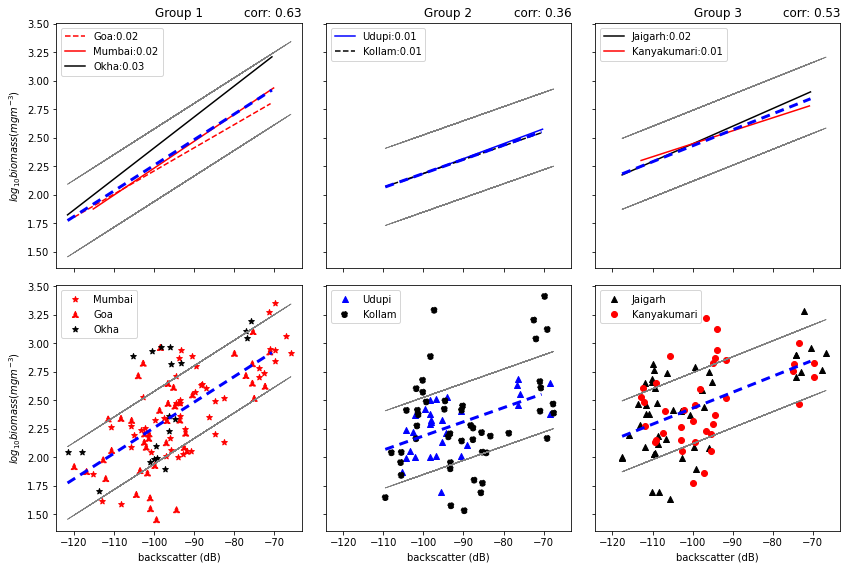

In [336]:
#converted to groups

group1_bs = [*x[0],*x[1],*x[3]]
group1_bm = [*y[0],*y[1],*y[3]]

group2_bs = [*x[4],*x[5]]
group2_bm = [*y[4],*y[5]]

group3_bs = [*x[2],*x[6]]
group3_bm = [*y[2],*y[6]]

gr_bs = [group1_bs,group2_bs,group3_bs]
gr_bm = [group1_bm,group2_bm,group3_bm]

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8),sharex=True, sharey=True)

ax[0,0].plot(np.arange(min(arr_bs[3]),-70,1),coef_og[0]*np.arange(min(arr_bs[3]),-70,1)+coef_og[1],color='r',label='Goa:'+str(slopey[3]),linestyle='dashed')
ax[0,0].plot(np.arange(min(arr_bs[1]),-70,1),coef_om[0]*np.arange(min(arr_bs[1]),-70,1)+coef_om[1],color='r',label='Mumbai:'+str(slopey[1]))
ax[0,0].plot(np.arange(min(arr_bs[0]),-70,1),coef_oo[0]*np.arange(min(arr_bs[0]),-70,1)+coef_oo[1],color='k',label='Okha:'+str(slopey[0]))

ax[0,1].plot(np.arange(min(arr_bs[4]),-70,1),coef_ou[0]*np.arange(min(arr_bs[4]),-70,1)+coef_ou[1],color='b',label='Udupi:'+str(slopey[4]) )
ax[0,1].plot(np.arange(min(arr_bs[5]),-70,1),coef_ok[0]*np.arange(min(arr_bs[5]),-70,1)+coef_ok[1],color='k',label='Kollam:'+str(slopey[5]),linestyle='dashed')

ax[0,2].plot(np.arange(min(arr_bs[2]),-70,1),coef_oj[0]*np.arange(min(arr_bs[2]),-70,1)+coef_oj[1],color='k',label='Jaigarh:'+str(slopey[2]))
ax[0,2].plot(np.arange(min(arr_bs[6]),-70,1),coef_kk[0]*np.arange(min(arr_bs[6]),-70,1)+coef_kk[1],color='r',label='Kanyakumari:'+str(slopey[6]))


ax[1,0].scatter(arr_bs[1],np.log10(arr_bm[1]),color='r',marker='*',label='Mumbai')
ax[1,0].scatter(arr_bs[3],np.log10(arr_bm[3]),color='r',marker='^',label='Goa',linestyle='dashed')
ax[1,0].scatter(arr_bs[0],np.log10(arr_bm[0]),color='k',marker='*',label='Okha')

ax[1,1].scatter(arr_bs[4],np.log10(arr_bm[4]),color='b',marker='^',label='Udupi')
ax[1,1].scatter(arr_bs[5],np.log10(arr_bm[5]),color='k',marker='o',label='Kollam',linestyle='dashed')

ax[1,2].scatter(arr_bs[2],np.log10(arr_bm[2]),color='k',marker='^',label='Jaigarh')
ax[1,2].scatter(arr_bs[6],np.log10(arr_bm[6]),color='r',marker='o',label='Kanyakumari')

ax[0,0].plot(np.arange(min(group1_bs),-70,1),coef_g1[0]*np.arange(min(group1_bs),-70,1)+coef_g1[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)
ax[0,1].plot(np.arange(min(group2_bs),-70,1),coef_g2[0]*np.arange(min(group2_bs),-70,1)+coef_g2[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)
ax[0,2].plot(np.arange(min(group3_bs),-70,1),coef_g3[0]*np.arange(min(group3_bs),-70,1)+coef_g3[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)


ax[1,0].plot(np.arange(min(group1_bs),-70,1),coef_g1[0]*np.arange(min(group1_bs),-70,1)+coef_g1[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)
ax[1,1].plot(np.arange(min(group2_bs),-70,1),coef_g2[0]*np.arange(min(group2_bs),-70,1)+coef_g2[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)
ax[1,2].plot(np.arange(min(group3_bs),-70,1),coef_g3[0]*np.arange(min(group3_bs),-70,1)+coef_g3[1],color='blue',linestyle='dashed',dashes=(3,2),linewidth=3)


for i in range(2):
    for j in range(3):
        coef = np.polyfit(gr_bs[j],np.log10(gr_bm[j]),degree)
        slope, intercept = coef
        slopey.append(np.round(slope,2))
        fit_line = slope * np.array(gr_bs[j]) + intercept 
        cor = np.round(np.corrcoef(gr_bs[j],gr_bm[j]),2)
        std_dev = np.std(np.log10(gr_bm[j])-fit_line)
        upper_bound = fit_line - std_dev
        lower_bound = fit_line + std_dev
        ax[i,j].plot(gr_bs[j],upper_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(gr_bs[j],lower_bound,color='grey',linewidth=0.8)

        ax[i,j].legend(loc='upper left')
        ax[1,j].set_xlabel('backscatter (dB)')
        ax[0,j].set_title(f'Group {j+1}')
        ax[0,j].set_title(f'corr: {cor[0,1]}',loc='right')

        ax[i,j].set_aspect(1./ax[i,j].get_data_ratio(),adjustable='box',anchor='SW')

    ax[i,0].set_ylabel("$log_{10}biomass (mg m^{-3})$")   
    
fig.tight_layout()
plt.savefig('/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/fig_03_bm_vs_bs_grouped_3.png',dpi=300,facecolor='w')

In [ ]:

### important

fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(12,7),sharey=True,sharex=True)

coef_oo = np.polyfit(arr_bs[0][~np.isnan(arr_bs[0])],np.log10(arr_bm[0][~np.isnan(arr_bm[0])]),degree)
trend_oo = np.poly1d(coef_oo)
ax[0,0].plot(arr_bs[0],trend_oo(arr_bs[0]),color='magenta')
ax[0,0].scatter(df['ood_bs'],np.log10(df['ood_bm']),color='k',marker='*',label='Okha')
    
coef_om = np.polyfit(arr_bs[1][~np.isnan(arr_bs[1])],np.log10(arr_bm[1][~np.isnan(arr_bm[1])]),degree)
trend_om = np.poly1d(coef_om)
ax[0,1].plot(arr_bs[1],trend_om(arr_bs[1]),color='magenta')
ax[0,1].scatter(df['omd_bs'],np.log10(df['omd_bm']),color='r',marker='*',label='Mumbai')

coef_oj = np.polyfit(arr_bs[2][~np.isnan(arr_bs[2])],np.log10(arr_bm[2][~np.isnan(arr_bm[2])]),degree)
trend_oj = np.poly1d(coef_oj)
ax[0,2].plot(arr_bs[2],trend_oj(arr_bs[2]),color='magenta')
ax[0,2].scatter(df['ojd_bs'],np.log10(df['ojd_bm']),color='k',marker='^',label='Jaigad')

coef_og = np.polyfit(arr_bs[3][~np.isnan(arr_bs[3])],np.log10(arr_bm[3][~np.isnan(arr_bm[3])]),degree)
trend_og = np.poly1d(coef_og)
ax[0,3].plot(arr_bs[3],trend_og(arr_bs[3]),color='magenta')
ax[0,3].scatter(df['ogd_bs'],np.log10(df['ogd_bm']),color='r',marker='^',label='Goa')

coef_ou = np.polyfit(arr_bs[4][~np.isnan(arr_bs[4])],np.log10(arr_bm[4][~np.isnan(arr_bm[4])]),degree)
trend_ou = np.poly1d(coef_ou)
ax[1,0].plot(arr_bs[4],trend_ou(arr_bs[4]),color='magenta')
ax[1,0].scatter(df['oud_bs'],np.log10(df['oud_bm']),color='b',marker='^',label='Udupi')
    
coef_ok = np.polyfit(arr_bs[5][~np.isnan(arr_bs[5])],np.log10(arr_bm[5][~np.isnan(arr_bm[5])]),degree)
trend_ok = np.poly1d(coef_ok)
ax[1,1].plot(arr_bs[5],trend_ok(arr_bs[5]),color='magenta')
ax[1,1].scatter(df['okd_bs'],np.log10(df['okd_bm']),color='k',marker='o',label='Kollam')

coef_kk = np.polyfit(arr_bs[6][~np.isnan(arr_bs[6])],np.log10(arr_bm[6][~np.isnan(arr_bm[6])]),degree)
trend_kk = np.poly1d(coef_kk)
ax[1,2].plot(arr_bs[6],trend_kk(arr_bs[6]),color='magenta')
ax[1,2].scatter(df['kkd_bs'],np.log10(df['kkd_bm']),color='r',marker='o',label='Kanyakumari')

coef_all = np.polyfit(arr_bs[7][~np.isnan(arr_bs[7])],np.log10(arr_bm[7][~np.isnan(arr_bm[7])]),degree)
trend_all = np.poly1d(coef_all)
ax[1,3].plot(arr_bs[7],trend_kk(arr_bs[7]),color='red')
ax[1,3].scatter(arr_bs[7],np.log10(arr_bm[7]),color='k',marker='*',label='2017-2023')


for i in range(2):
    for j in range(4):
        ax[i,j].set_aspect(1./ax[i,j].get_data_ratio(),adjustable='box',anchor='SW')
        ax[i,j].legend(loc='upper left')
        ax[1,j].set_xlabel('backscatter (dB)')
#       ax[i,j].text(0.1, -1, "text")
    ax[i,0].set_ylabel("$log_{10}biomass (mg m^{-3})$")    
        
fig.tight_layout()

#plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/biomass_vs_backscatter_all+linfit.png",dpi=300,facecolor='w')


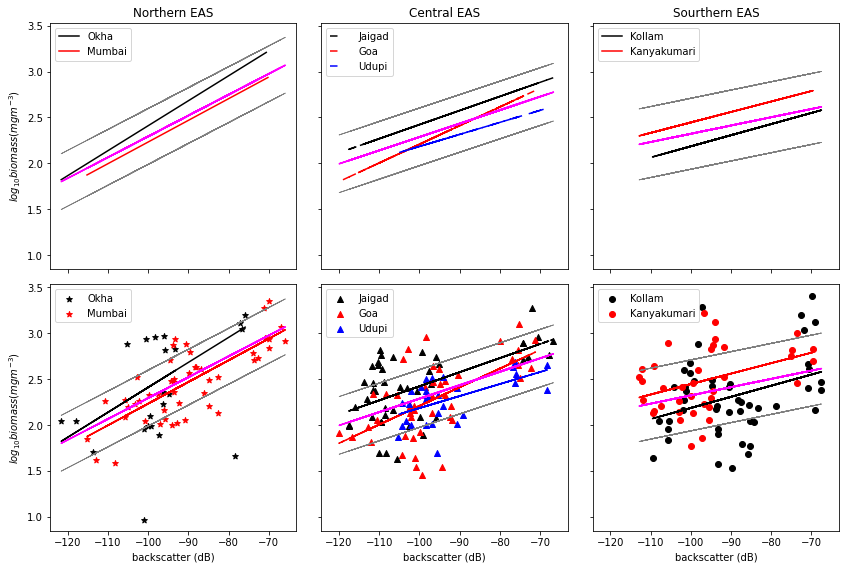

In [328]:
########################## Latitude wise change in the slope


tren1 = []
for i in range(7):
    coef = np.polyfit(arr_bs[i][~np.isnan(arr_bs[i])],np.log10(arr_bm[i][~np.isnan(arr_bm[i])]),degree)
    trendlinee = np.poly1d(coef)
    tren1.append(trendlinee)
tren = tren1
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8),sharey=True,sharex=True)

ax[0,0].plot(np.arange(min(arr_bs[0]),-70,1),coef_oo[0]*np.arange(min(arr_bs[0]),-70,1)+coef_oo[1],color='k',label='Okha')
ax[0,0].plot(np.arange(min(arr_bs[1]),-70,1),coef_om[0]*np.arange(min(arr_bs[1]),-70,1)+coef_om[1],color='r',label='Mumbai')
ax[0,0].legend(loc='upper left')


ax[0,1].plot(arr_bs[2],tren1[2](arr_bs[2]),color='k',label='Jaigad',linestyle='--')
ax[0,1].plot(arr_bs[3],tren1[3](arr_bs[3]),color='r',label='Goa',linestyle='--')
ax[0,1].plot(arr_bs[4],tren1[4](arr_bs[4]),color='b',label='Udupi',linestyle='--')
ax[0,1].legend(loc='upper left')


ax[0,2].plot(arr_bs[5],tren1[5](arr_bs[5]),color='k',label='Kollam')
ax[0,2].plot(arr_bs[6],tren1[6](arr_bs[6]),color='r',label='Kanyakumari')
ax[0,2].legend(loc='upper left')

ax[1,0].scatter(df['ood_bs'],np.log10(df['ood_bm']),color='k',marker='*',label='Okha')
ax[1,0].scatter(df['omd_bs'],np.log10(df['omd_bm']),color='r',marker='*',label='Mumbai')
ax[1,0].plot(arr_bs[0],tren1[0](arr_bs[0]),color='k')
ax[1,0].plot(arr_bs[1],tren1[1](arr_bs[1]),color='r')
ax[1,0].legend(loc='upper left')


ax[1,1].scatter(df['ojd_bs'],np.log10(df['ojd_bm']),color='k',marker='^',label='Jaigad')
ax[1,1].scatter(df['ogd_bs'],np.log10(df['ogd_bm']),color='r',marker='^',label='Goa')
ax[1,1].scatter(df['oud_bs'],np.log10(df['oud_bm']),color='b',marker='^',label='Udupi')
ax[1,1].plot(arr_bs[2],tren1[2](arr_bs[2]),color='k',linestyle='--')
ax[1,1].plot(arr_bs[3],tren1[3](arr_bs[3]),color='r',linestyle='--')
ax[1,1].plot(arr_bs[4],tren1[4](arr_bs[4]),color='b',linestyle='--')
ax[1,1].legend(loc='upper left')


ax[1,2].scatter(df['okd_bs'],np.log10(df['okd_bm']),color='k',marker='o',label='Kollam')
ax[1,2].scatter(df['kkd_bs'],np.log10(df['kkd_bm']),color='r',marker='o',label='Kanyakumari')
ax[1,2].plot(arr_bs[5],tren1[5](arr_bs[5]),color='k')
ax[1,2].plot(arr_bs[6],tren1[6](arr_bs[6]),color='r')
ax[1,2].legend(loc='upper left')


group1_bs = [*x[0],*x[1]]
group1_bm = [*y[0],*y[1]]

group2_bs = [*x[2],*x[3],*x[4]]
group2_bm = [*y[2],*y[3],*y[4]]

group3_bs = [*x[5],*x[6]]
group3_bm = [*y[5],*y[6]]

gr_bs = [group1_bs,group2_bs,group3_bs]
gr_bm = [group1_bm,group2_bm,group3_bm]


for i in range(2):
    for j in range(3):
        coef = np.polyfit(gr_bs[j],np.log10(gr_bm[j]),degree)
        slope, intercept = coef
        slopey.append(np.round(slope,2))
        fit_line = slope * np.array(gr_bs[j]) + intercept 
        cor = np.round(np.corrcoef(gr_bs[j],gr_bm[j]),2)
        std_dev = np.std(np.log10(gr_bm[j])-fit_line)
        upper_bound = fit_line - std_dev
        lower_bound = fit_line + std_dev
        ax[i,j].plot(gr_bs[j],fit_line,color="magenta")
        ax[i,j].plot(gr_bs[j],upper_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(gr_bs[j],lower_bound,color='grey',linewidth=0.8)

        ax[i,j].legend(loc='upper left')
        ax[1,j].set_xlabel('backscatter (dB)')
        ax[0,j].set_title(f'Group {j+1}')
        ax[i,j].set_aspect(1./ax[i,j].get_data_ratio(),adjustable='box',anchor='SW')

    ax[i,0].set_ylabel("$log_{10}biomass (mg m^{-3})$")   

ax[0,0].set_title('Northern EAS')
ax[0,1].set_title('Central EAS')
ax[0,2].set_title('Sourthern EAS')

fig.tight_layout()

plt.savefig("/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/fig_02_bm_vs_Bs_latitudinal_changes.png",dpi=300,facecolor='w')



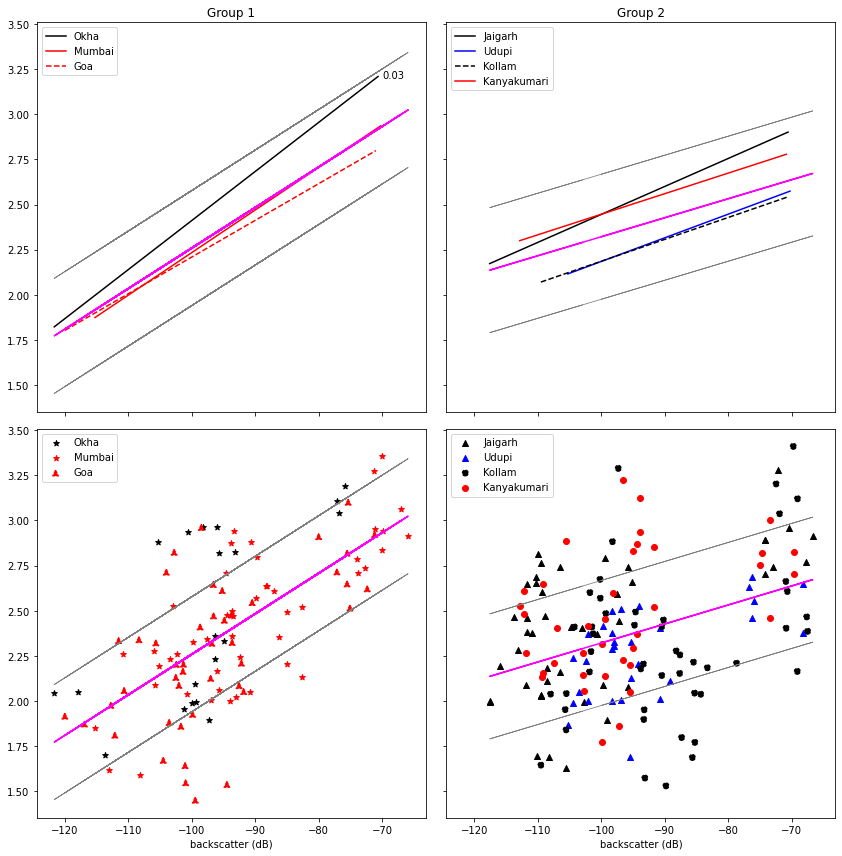

In [332]:
group1_bs = [*x[0],*x[1],*x[3]]
group1_bm = [*y[0],*y[1],*y[3]]

group2_bs = [*x[2],*x[4],*x[5],*x[6]]
group2_bm = [*y[2],*y[4],*y[5],*y[6]]



gr_bs = [group1_bs,group2_bs]
gr_bm = [group1_bm,group2_bm]



tren1 = []
for i in range(7):
    coef = np.polyfit(arr_bs[i][~np.isnan(arr_bs[i])],np.log10(arr_bm[i][~np.isnan(arr_bm[i])]),degree)
    trendlinee = np.poly1d(coef)
    tren1.append(trendlinee)
tren = tren1
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12),sharey=True,sharex=True)

ax[0,0].plot(np.arange(min(arr_bs[0]),-70,1),coef_oo[0]*np.arange(min(arr_bs[0]),-70,1)+coef_oo[1],color='k',label='Okha')
ax[0,0].plot(np.arange(min(arr_bs[1]),-70,1),coef_om[0]*np.arange(min(arr_bs[1]),-70,1)+coef_om[1],color='r',label='Mumbai')
ax[0,0].plot(np.arange(min(arr_bs[3]),-70,1),coef_og[0]*np.arange(min(arr_bs[3]),-70,1)+coef_og[1],color='r',label='Goa',linestyle='dashed')
#ax[0,0].plot(np.arange(min(group1_bs),-70,1),coef_g1[0]*np.arange(min(group1_bs),-70,1)+coef_g1[1],color='magenta',label='group1',linewidth=3)
ax[0,0].legend(loc='upper left')


ax[0,1].plot(np.arange(min(arr_bs[2]),-70,1),coef_oj[0]*np.arange(min(arr_bs[2]),-70,1)+coef_oj[1],color='k',label='Jaigarh')
ax[0,1].plot(np.arange(min(arr_bs[4]),-70,1),coef_ou[0]*np.arange(min(arr_bs[4]),-70,1)+coef_ou[1],color='b',label='Udupi')
ax[0,1].plot(np.arange(min(arr_bs[5]),-70,1),coef_ok[0]*np.arange(min(arr_bs[5]),-70,1)+coef_ok[1],color='k',label='Kollam',linestyle='dashed')
ax[0,1].plot(np.arange(min(arr_bs[6]),-70,1),coef_kk[0]*np.arange(min(arr_bs[6]),-70,1)+coef_kk[1],color='r',label='Kanyakumari')
#ax[0,1].plot(np.arange(min(group2_bs),-70,1),coef_g2[0]*np.arange(min(group2_bs),-70,1)+coef_g2[1],color='magenta',label='group2',linestyle='dashed',linewidth=3)
ax[0,1].legend(loc='upper left')

ax[1,0].scatter(arr_bs[0],np.log10(arr_bm[0]),color='k',marker='*',label='Okha')
ax[1,0].scatter(arr_bs[1],np.log10(arr_bm[1]),color='r',marker='*',label='Mumbai')
ax[1,0].scatter(arr_bs[3],np.log10(arr_bm[3]),color='r',marker='^',label='Goa',linestyle='dashed')
#ax[1,0].plot(np.arange(min(group1_bs),-70,1),coef_g1[0]*np.arange(min(group1_bs),-70,1)+coef_g1[1],color='magenta',label='group1',linewidth=3)
ax[1,0].legend(loc='upper left')


ax[1,1].scatter(arr_bs[2],np.log10(arr_bm[2]),color='k',marker='^',label='Jaigarh')
ax[1,1].scatter(arr_bs[4],np.log10(arr_bm[4]),color='b',marker='^',label='Udupi')
ax[1,1].scatter(arr_bs[5],np.log10(arr_bm[5]),color='k',marker='o',label='Kollam',linestyle='dashed')
ax[1,1].scatter(arr_bs[6],np.log10(arr_bm[6]),color='r',marker='o',label='Kanyakumari')
#ax[1,1].plot(np.arange(min(group2_bs),-70,1),coef_g2[0]*np.arange(min(group2_bs),-70,1)+coef_g2[1],color='magenta',label='group2',linestyle='dashed',linewidth=3)

ax[1,1].legend(loc='upper left')



"""
ax[1,0].plot(np.arange(min(arr_bs[0]),-70,1),coef_oo[0]*np.arange(min(arr_bs[0]),-70,1)+coef_oo[1],color='k',label='Okha')
ax[1,0].plot(np.arange(min(arr_bs[1]),-70,1),coef_om[0]*np.arange(min(arr_bs[1]),-70,1)+coef_om[1],color='r',label='Mumbai')
ax[1,0].plot(np.arange(min(arr_bs[3]),-70,1),coef_og[0]*np.arange(min(arr_bs[3]),-70,1)+coef_og[1],color='r',label='Goa',linestyle='dashed')
ax[1,0].legend(loc='upper right')


ax[1,1].plot(np.arange(min(arr_bs[2]),-70,1),coef_oj[0]*np.arange(min(arr_bs[2]),-70,1)+coef_oj[1],color='k',label='Jaigarh')
ax[1,1].plot(np.arange(min(arr_bs[4]),-70,1),coef_ou[0]*np.arange(min(arr_bs[4]),-70,1)+coef_ou[1],color='b',label='Udupi')
ax[1,1].plot(np.arange(min(arr_bs[5]),-70,1),coef_ok[0]*np.arange(min(arr_bs[5]),-70,1)+coef_ok[1],color='k',label='Kollam',linestyle='dashed')
ax[1,1].plot(np.arange(min(arr_bs[6]),-70,1),coef_kk[0]*np.arange(min(arr_bs[6]),-70,1)+coef_kk[1],color='r',label='Kanyakumari')
ax[1,1].legend(loc='upper right')

"""


for i in range(2):
    for j in range(2):
        coef = np.polyfit(gr_bs[j],np.log10(gr_bm[j]),degree)
        slope, intercept = coef
        slopey.append(np.round(slope,2))
        fit_line = slope * np.array(gr_bs[j]) + intercept 
        cor = np.round(np.corrcoef(gr_bs[j],gr_bm[j]),2)
        std_dev = np.std(np.log10(gr_bm[j])-fit_line)
        upper_bound = fit_line - std_dev
        lower_bound = fit_line + std_dev
        ax[i,j].plot(gr_bs[j],fit_line,color="magenta")
        ax[i,j].plot(gr_bs[j],upper_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(gr_bs[j],lower_bound,color='grey',linewidth=0.8)

        ax[i,j].legend(loc='upper left')
        ax[1,j].set_xlabel('backscatter (dB)')
        ax[0,j].set_title(f'Group {j+1}')
        ax[i,j].set_aspect(1./ax[i,j].get_data_ratio(),adjustable='box',anchor='SW')

    
ax[0,0].text(-70,3.2,np.round(coef_oo[0],2))
fig.tight_layout()
plt.savefig('/media/scilab/disk_ranjan/works/westcoast_adcp1/biomass/biomass_bs/fig_04_bm_vs_bs_grouped_2.png',dpi=400,facecolor='w')


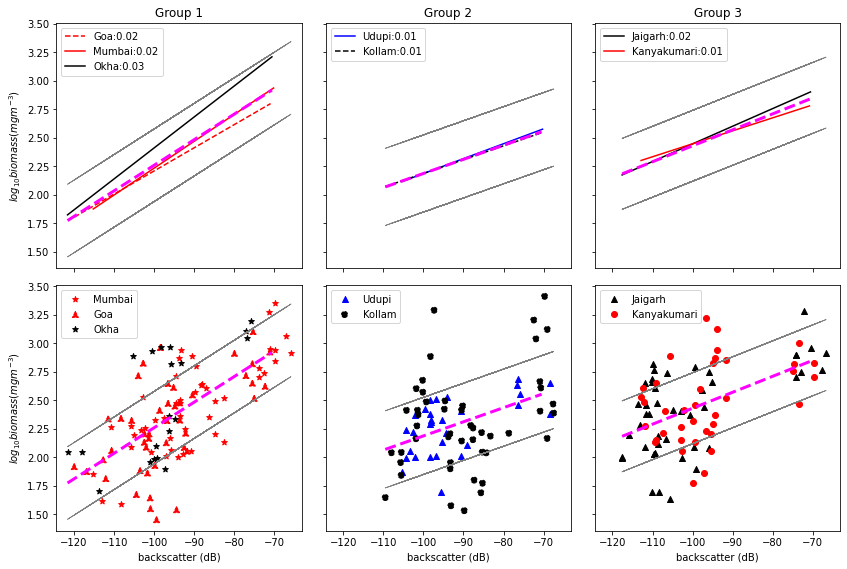

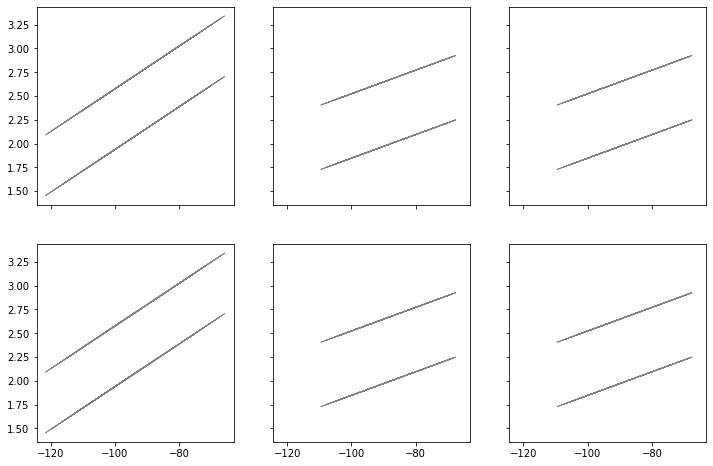

In [299]:
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(12,8),sharex=True, sharey=True)
for i in range(2):
    for j in range(3):
        coef = np.polyfit(gr_bs[j],np.log10(gr_bm[j]),degree)
        slope, intercept = coef
        slopey.append(np.round(slope,2))
        fit_line = slope * np.array(gr_bs[j]) + intercept 
        cor = np.round(np.corrcoef(gr_bs[j],gr_bm[j]),2)
        std_dev = np.std(np.log10(gr_bm[j])-fit_line)
        upper_bound = fit_line - std_dev
        lower_bound = fit_line + std_dev
        ax[i,j].plot(gr_bs[j],upper_bound,color='grey',linewidth=0.8)
        ax[i,j].plot(gr_bs[j],lower_bound,color='grey',linewidth=0.8)
